## Quantum Euclidean Distance

ref)  
Helen Urgelles  
https://medium.com/qiskit/calculate-quantum-euclidean-distance-with-qiskit-df85525ab485  

ref2)  
Application of Quantum Computing to Accurate Positioning in 6G Indoor Scenarios  
https://ieeexplore.ieee.org/document/9838523

- Euclidean space is the most fundamental way we represent space in geometry.
- How do you calculate the quantum version of Euclidiean distance with Qiskit?
- Earlier this year, I, along with Pablo Picazo-Martínez and Jose F.Monserrat, presented an indoor localization based on Quantum Euclidean Distance, programmed in Qiskit and executed on IBM Quantum systems

## SWAP test

- 1 quantum/classical register + 2 auxiliary quantum register for two quantum states $\psi$ and $\phi$
- measure the probability $|0\rangle$ state of 1 quantum register, $P_0=\frac{1}{2}(1+\langle \psi|\phi \rangle)$
- if $P_0=0.5$, $\langle \psi|\phi \rangle=0$(orthogonal). 
- if $P_0=1.0$, $\langle \psi|\phi \rangle=1$. 

In [1]:
from qiskit import *
from qiskit import BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

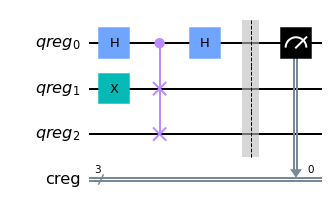

In [2]:
qreg = QuantumRegister(3, 'qreg')
creg = ClassicalRegister(3, 'creg')
qc = QuantumCircuit (qreg,creg)

#Initial state |01> (big endian)
qc.x(qreg[1])

#swap_test
qc.h(qreg[0]) #apply superposition on the auxiliary qubit
qc.cswap(qreg[0], qreg[1], qreg[2]) # controlled-SWAP
qc.h(qreg[0]) 

qc.barrier()
qc.measure(qreg[0],creg[0])

display(qc.draw(output="mpl"))

In [3]:
#result
shots = 1024
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=shots)
job_result = job.result()
counts = job_result.get_counts(qc)
print(counts)

{'001': 509, '000': 515}


The results agree with the SWAP test function, where if P|0> = 0.5 on the
control qubit, this means that the states are orthogonal, and if P|0> = 1, then
the states are identical.

## Qunatum Euclidean Distance

Once we have the SWAP test operator as a tool, we can use it to find the distance between two vectors on quantum computers.  

Once the data is encoded, we can calculate the distance between states $\psi$ and $\phi$ with the help of the SWAP test operator. With A and B classical data vectors, let’s go through an example step by step:

In [4]:
import numpy as np
from qiskit import *
from qiskit import BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

### encoding the classical data asa quantum state $\psi$ and $\phi$

In [5]:
A = np.array([2,9,8,5])
B = np.array([7,5,10,3])

norm_A = np.sqrt(np.sum(A**2))
norm_B = np.sqrt(np.sum(B**2))
Dist = np.sqrt(np.sum((A-B)**2))

Z = norm_A**2 + norm_B**2

phi = [norm_A/np.sqrt(Z), -norm_B/np.sqrt(Z)]
psi_0 = A/norm_A/np.sqrt(2)
psi_1 = B/norm_B/np.sqrt(2)

psi = []
for i in range(len(A)):
    psi.append(psi_0[i])
    psi.append(psi_1[i])

### make the quantum circuit

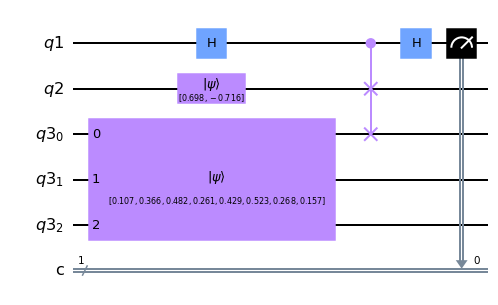

In [6]:
# Quantum Circuit
q1 = QuantumRegister(1, 'q1')
q2 = QuantumRegister(1, name = 'q2')
q3 = QuantumRegister(3, name = 'q3')
c = ClassicalRegister(1, name = 'c')
qc = QuantumCircuit(q1,q2,q3,c)

#States initialization
qc.initialize(phi, q2)
qc.initialize(psi, q3)

#swap_test
qc.h(q1)
qc.cswap(q1[0], q2[0], q3[0])
qc.h(q1) 
qc.measure(q1,c)

display(qc.draw(output="mpl"))

In [7]:
## results
shots = 100000
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=shots)
job_result = job.result()
counts = job_result.get_counts(qc)
print(counts)

x = abs(((counts['0']/shots - 0.5)/0.5) * 2 * Z)
Q_Dist = round(np.sqrt(x),4)
print('Quantum Distance: ', round(Q_Dist,3))
print('Euclidean Distance: ',round(Dist,3))
print('Difference between Quantum and Euclidean distance: ', np.abs(round(Q_Dist,3)-round(Dist,3)))


{'0': 53436, '1': 46564}
Quantum Distance:  7.005
Euclidean Distance:  7.0
Difference between Quantum and Euclidean distance:  0.004999999999999893


The values obtained are almost equal. Since the results from a quantum computer are probabilistic, they may differ slightly. In any case, it still makes sense. We also think that one day, with large enough vector size, quantum may be able to outperform classical on this computation.

In [8]:
import qiskit.tools.jupyter
%qiskit_version_table